Explanation of project pipeline using PPT on youtube
https://www.youtube.com/watch?v=w0OVqNvNS30&t=4s

In [22]:
# setting_up to hide the unwanted warnings
import warnings
warnings.filterwarnings('ignore')

In [23]:
# loading the dataset
import pandas as pd
data = pd.read_csv('online_shoppers_intention.csv')
data_copy = data.copy()

In [24]:
# with data dictionary and this data_o/p we get to know
# that how a feature have been represented in the data (numerically or categorically)
# and then we look at 3 things: 1. size of dataset->multidimensionality, 2. dtype of each feature(num/cat), 3. dtype of target feature->target ml problem type 
display(data)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates in %,ExitRates in %,PageValues,SpecialDay (probability),Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [25]:
# exploring the first report of the data to diagnose the problems in it
# by comparing data.head()_report and this info()_report, we can check if dtype of features has been assigned correctly or not.
# missing value problem we also check using this info() report, but this problem is best checked using below 2 reports(missingno and missing_row%)
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Administrative            12330 non-null  int64  
 1   Administrative_Duration   12330 non-null  float64
 2   Informational             12330 non-null  int64  
 3   Informational_Duration    12330 non-null  float64
 4   ProductRelated            12330 non-null  int64  
 5   ProductRelated_Duration   12330 non-null  float64
 6   BounceRates in %          12330 non-null  float64
 7   ExitRates in %            12330 non-null  float64
 8   PageValues                12330 non-null  float64
 9   SpecialDay (probability)  12330 non-null  float64
 10  Month                     12330 non-null  object 
 11  OperatingSystems          12330 non-null  int64  
 12  Browser                   12330 non-null  int64  
 13  Region                    12330 non-null  int64  
 14  Traffi

None

Administrative              0
Administrative_Duration     0
Informational               0
Informational_Duration      0
ProductRelated              0
ProductRelated_Duration     0
BounceRates in %            0
ExitRates in %              0
PageValues                  0
SpecialDay (probability)    0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64

<AxesSubplot: >

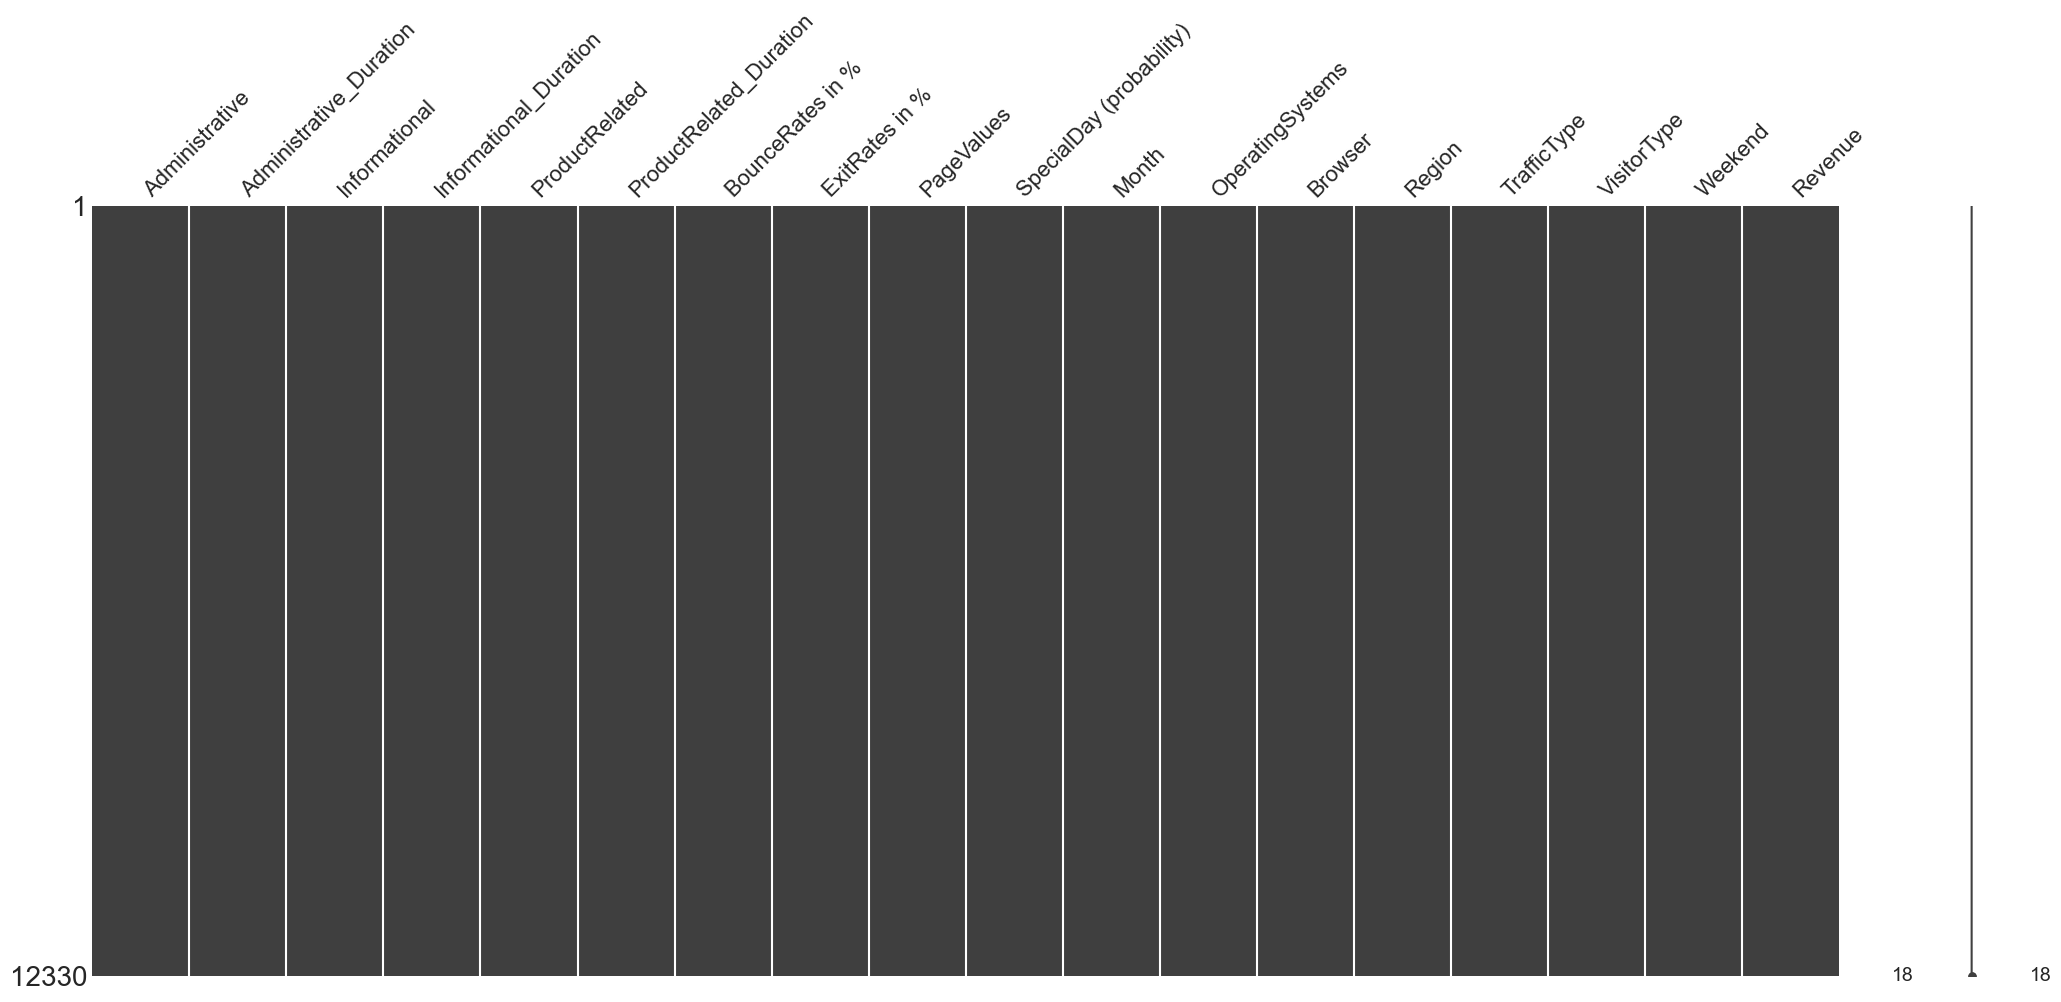

In [26]:
# exploratory visualizaion of data to check missing value problem
display(data.isnull().sum())
import missingno as msno
msno.matrix(data)

In [27]:
# replacing value 0 with NAN to mark missing values in 3 columns

# priting no of NAN values in above imputed cols 
display(data)
for cols in ['Administrative','Informational','ProductRelated']:
    print(f'{cols} null values:', data[cols].isnull().sum(), sep = '\n')

# 0->NAN imputation
import numpy as np
for cols in ['Administrative','Informational','ProductRelated']:
    data[cols].replace(0, np.nan, inplace= True)

# priting no of NAN values in above imputed cols
display(data)
for cols in ['Administrative','Informational','ProductRelated']:
    print(f'{cols} null values:', data[cols].isnull().sum(), sep = '\n')


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates in %,ExitRates in %,PageValues,SpecialDay (probability),Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


Administrative null values:
0
Informational null values:
0
ProductRelated null values:
0


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates in %,ExitRates in %,PageValues,SpecialDay (probability),Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,NaN,0.0,NaN,0.0,1.0,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,NaN,0.0,NaN,0.0,2.0,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,NaN,0.0,NaN,0.0,1.0,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,NaN,0.0,NaN,0.0,2.0,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,NaN,0.0,NaN,0.0,10.0,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3.0,145.0,NaN,0.0,53.0,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,NaN,0.0,NaN,0.0,5.0,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,NaN,0.0,NaN,0.0,6.0,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4.0,75.0,NaN,0.0,15.0,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


Administrative null values:
5768
Informational null values:
9699
ProductRelated null values:
38


In [28]:
# printing unique values in each of the 3 cols to diagnose wrong_format_value_cell_problem
for cols in ['Administrative','Informational','ProductRelated']:
    print(f'Unique values in column {cols} are: ')
    display(data[cols].unique())

Unique values in column Administrative are: 


array([nan,  1.,  2.,  4., 12.,  3., 10.,  6.,  5.,  9.,  8., 16., 13.,
       11.,  7., 18., 14., 17., 19., 15., 24., 22., 21., 20., 23., 27.,
       26.])

Unique values in column Informational are: 


array([nan,  1.,  2.,  4., 16.,  5.,  3., 14.,  6., 12.,  7.,  9., 10.,
        8., 11., 24., 13.])

Unique values in column ProductRelated are: 


array([  1.,   2.,  10.,  19.,  nan,   3.,  16.,   7.,   6.,  23.,  13.,
        20.,   8.,   5.,  32.,   4.,  45.,  14.,  52.,   9.,  46.,  15.,
        22.,  11.,  12.,  36.,  42.,  27.,  90.,  18.,  38.,  17., 128.,
        25.,  30.,  21.,  51.,  26.,  28.,  31.,  24.,  50.,  96.,  49.,
        68.,  98.,  67.,  55.,  35.,  37.,  29.,  34.,  71.,  63.,  87.,
        40.,  33.,  54.,  64.,  75.,  39., 111.,  81.,  61.,  47.,  44.,
        88., 149.,  41.,  79.,  66.,  43., 258.,  80.,  62.,  83., 173.,
        48.,  58.,  57.,  56.,  69.,  82.,  59., 109., 287.,  53.,  84.,
        78., 137., 113.,  89.,  65.,  60., 104., 129.,  77.,  74.,  93.,
        76.,  72., 194., 140., 110., 132., 115.,  73., 328., 160.,  86.,
       150.,  95., 130., 151., 117., 124., 127., 125., 116., 105.,  92.,
       157., 154., 220., 187., 112., 131., 159.,  94., 204., 142., 206.,
       102., 313., 145.,  85.,  97., 198., 181., 126., 106., 101., 108.,
       119.,  70., 122.,  91., 276., 100., 291., 11

Text(0.5, 1.0, 'ProductRelated')

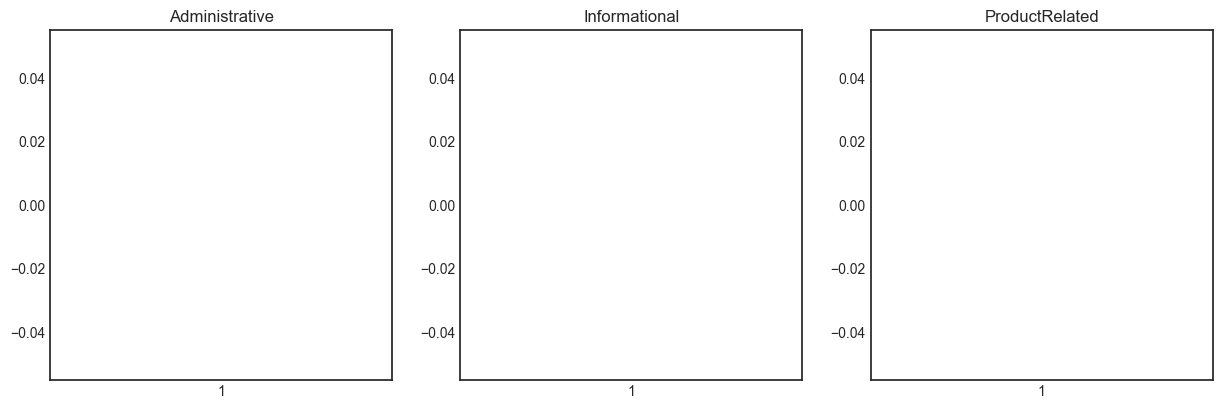

In [29]:
# checking outlier problem in numerical cols
import matplotlib.pyplot as plt
plt.figure(figsize = (15, 10))
plt.style.use('seaborn-white')

ax=plt.subplot(234)
plt.boxplot(data['Administrative'])
ax.set_title('Administrative')

ax=plt.subplot(235)
plt.boxplot(data['Informational'])
ax.set_title('Informational')

ax=plt.subplot(236)
plt.boxplot(data['ProductRelated'])
ax.set_title('ProductRelated')

In [30]:
# imputing null values with median as there are outliers in those num_cols
for cols in ['Administrative','Informational','ProductRelated']:
    median_value = data[cols].median()
    data[cols] = data[cols].fillna(median_value)

# checking NAN/null values again after imputation 
for cols in ['Administrative','Informational','ProductRelated']:
    print('{} null values:'.format(cols), data[cols].isnull().sum(), sep = '\n')

Administrative null values:
0
Informational null values:
0
ProductRelated null values:
0


In [31]:
# checking null values in each col before marking NAN
print('null values in each col before marking NAN: ')
for cols in ['Administrative_Duration','Informational_Duration','ProductRelated_Duration']:
    print('{} null values:'.format(cols), data[cols].isnull().sum(), sep = '\n')
    
# replacing unexpected_values in these num_cols with null/NAN to mark missing values  
for cols in ['Administrative_Duration','Informational_Duration','ProductRelated_Duration']:
    data[cols].replace(0, np.nan, inplace= True)
for cols in ['Administrative_Duration','Informational_Duration','ProductRelated_Duration']:
    data[cols].replace(-1, np.nan, inplace= True)
    
# checking null values in each col after marking NAN
print('\n')
print('null values in each col after marking NAN: ')
for cols in ['Administrative_Duration','Informational_Duration','ProductRelated_Duration']:
    print('{} null values:'.format(cols), data[cols].isnull().sum(), sep = '\n')
    
# since these num_cols don't contain outliers, we can impute theme with mean values
for cols in ['Administrative_Duration','Informational_Duration','ProductRelated_Duration','BounceRates in %','ExitRates in %']:
    mean_value = data[cols].mean()
    data[cols] = data[cols].fillna(mean_value)

# checking null values in each col after imputation
print('\n')
print('null values in each col after imputing NAN: ')
for cols in ['Administrative_Duration','Informational_Duration','ProductRelated_Duration','BounceRates in %','ExitRates in %']:
    print('{} null values:'.format(cols), data[cols].isnull().sum(), sep = '\n')

null values in each col before marking NAN: 
Administrative_Duration null values:
0
Informational_Duration null values:
0
ProductRelated_Duration null values:
0


null values in each col after marking NAN: 
Administrative_Duration null values:
5903
Informational_Duration null values:
9925
ProductRelated_Duration null values:
755


null values in each col after imputing NAN: 
Administrative_Duration null values:
0
Informational_Duration null values:
0
ProductRelated_Duration null values:
0
BounceRates in % null values:
0
ExitRates in % null values:
0


<AxesSubplot: xlabel='ProductRelated', ylabel='ProductRelated_Duration'>

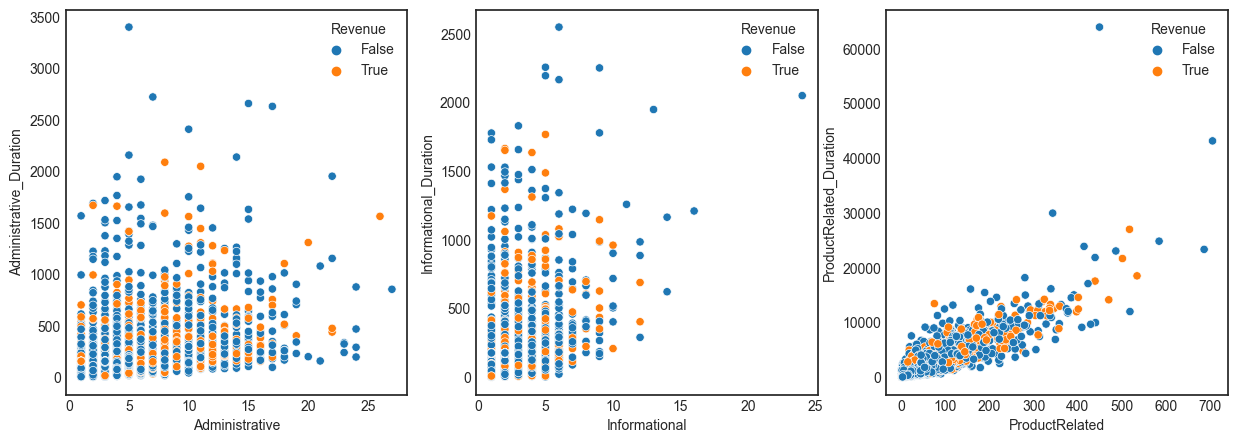

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (15, 5))
#plt.style.use('seaborn-white')
plt.subplot(131)
sns.scatterplot(x="Administrative", y="Administrative_Duration",hue="Revenue", data=data)
plt.subplot(132)
sns.scatterplot(x="Informational", y="Informational_Duration",hue="Revenue", data=data)
plt.subplot(133)
sns.scatterplot(x="ProductRelated", y="ProductRelated_Duration",hue="Revenue", data=data)

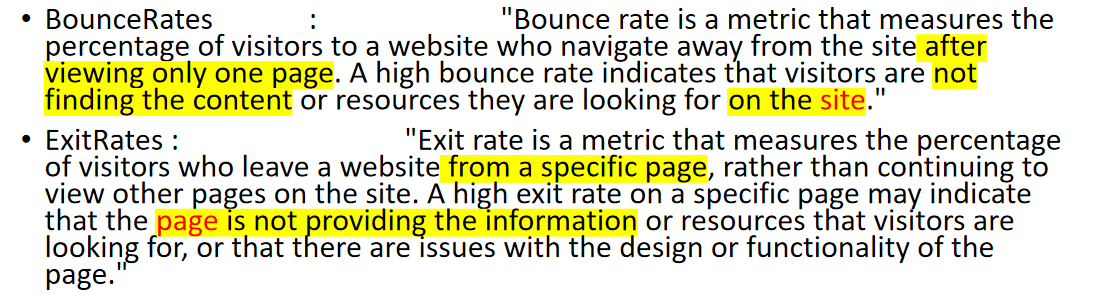

so basically 
1) BounceRate = viewer is not finding desired content on the WEBSITE
2) ExitRate = viewer is not finding desired content on the PAGE

HOW?-> is BlackBoxed

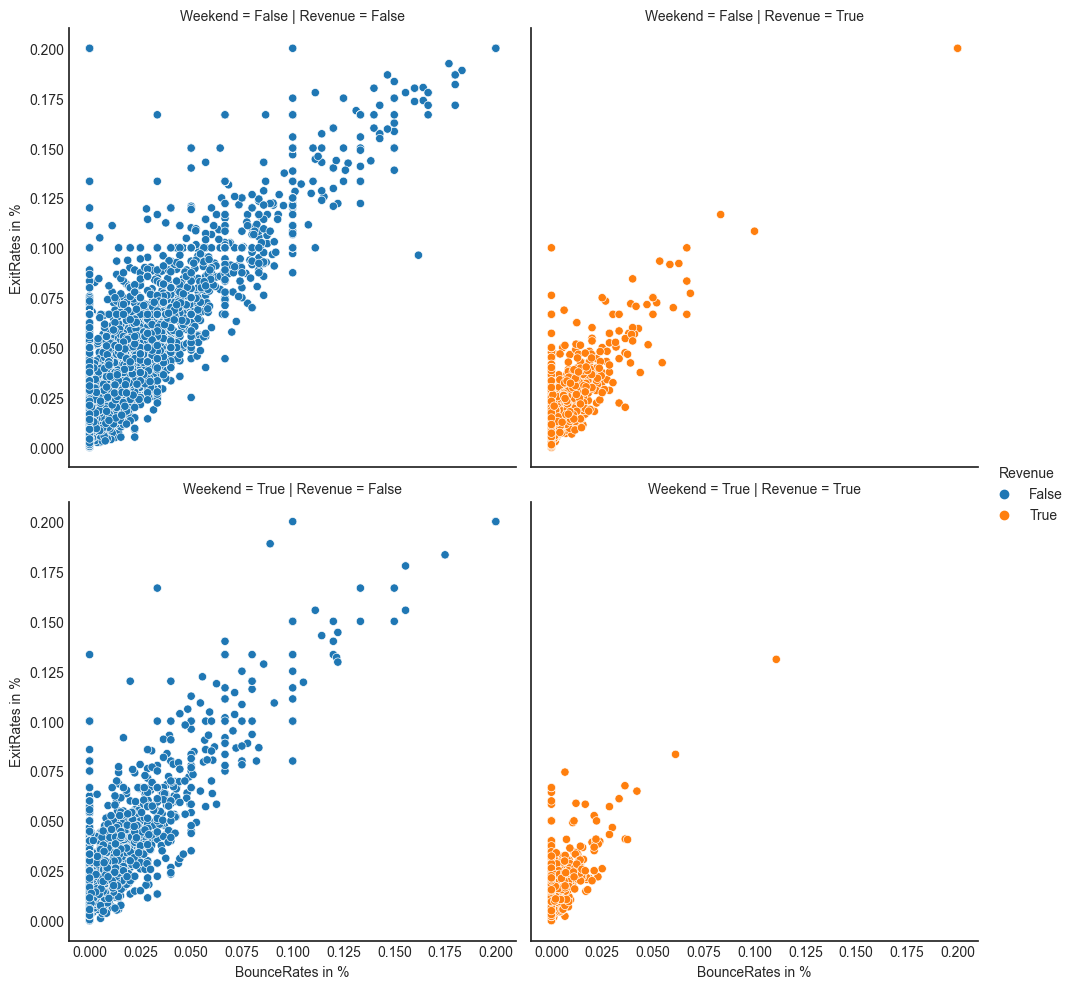

In [34]:
# display(data)
sns.relplot(x="BounceRates in %", y="ExitRates in %",col="Revenue",hue="Revenue",row="Weekend", data=data)

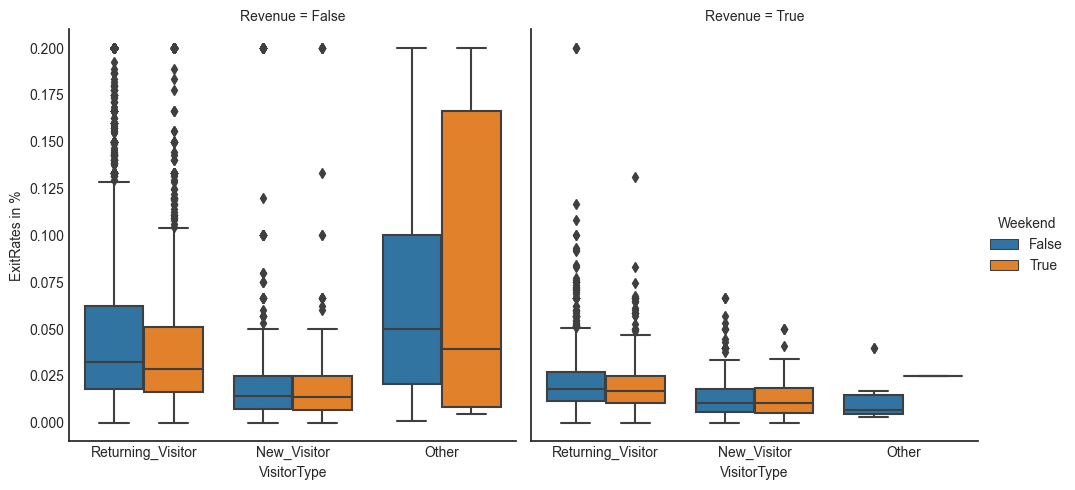

In [35]:
sns.catplot(x="VisitorType", y="ExitRates in %",
                hue="Weekend", col="Revenue",
                data=data, kind="box")

[Text(0.5, 0, 'Administrative'),
 Text(1.5, 0, 'Administrative_Duration'),
 Text(2.5, 0, 'Informational'),
 Text(3.5, 0, 'Informational_Duration'),
 Text(4.5, 0, 'ProductRelated'),
 Text(5.5, 0, 'ProductRelated_Duration'),
 Text(6.5, 0, 'BounceRates in %'),
 Text(7.5, 0, 'ExitRates in %'),
 Text(8.5, 0, 'PageValues'),
 Text(9.5, 0, 'SpecialDay (probability)'),
 Text(10.5, 0, 'OperatingSystems'),
 Text(11.5, 0, 'Browser'),
 Text(12.5, 0, 'Region'),
 Text(13.5, 0, 'TrafficType'),
 Text(14.5, 0, 'Weekend'),
 Text(15.5, 0, 'Revenue')]

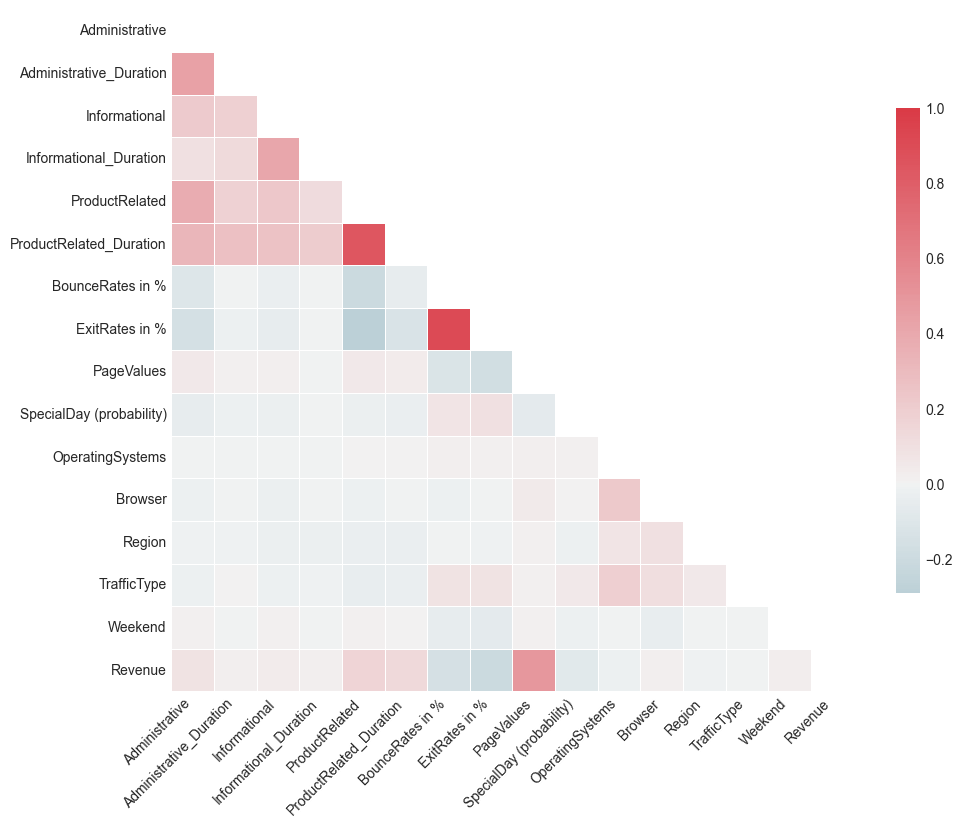

In [36]:
# ! pip install missingno
# import missingno as msno
# print("Missingno Version : {}".format(msno.__version__))
# msno.heatmap(data[:3], figsize=(10,5), fontsize=12)
# # msno.bar(data.corr(), color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=12)
# ---------------------------------------------------------------------------------------------missingno.heatmap() didn't work

# Generate a mask for the upper triangle
import numpy as np
mask = np.zeros_like(data.corr(), dtype=np.bool)
# display(data.corr())
mask[np.triu_indices_from(mask)] = True

# applying one more mask to hide those corr() cells from corr_matrix for which value is <0.75
corr_matrix = data.corr()
corr_matrix = corr_matrix >=  0.75
# display(corr_matrix)
    
# Set up the matplotlib figure
from matplotlib import pyplot as plt
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
#cmap = sns.diverging_palette(20, 220, n=400)

# plotting the corr_matrix
import seaborn as sns
ax = sns.heatmap(data.corr(), mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .7})
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

'highly correlated features: '

[Text(0.5, 0, 'Administrative'),
 Text(1.5, 0, 'Administrative_Duration'),
 Text(2.5, 0, 'Informational'),
 Text(3.5, 0, 'Informational_Duration'),
 Text(4.5, 0, 'ProductRelated'),
 Text(5.5, 0, 'ProductRelated_Duration'),
 Text(6.5, 0, 'BounceRates in %'),
 Text(7.5, 0, 'ExitRates in %'),
 Text(8.5, 0, 'PageValues'),
 Text(9.5, 0, 'SpecialDay (probability)'),
 Text(10.5, 0, 'OperatingSystems'),
 Text(11.5, 0, 'Browser'),
 Text(12.5, 0, 'Region'),
 Text(13.5, 0, 'TrafficType'),
 Text(14.5, 0, 'Weekend'),
 Text(15.5, 0, 'Revenue')]

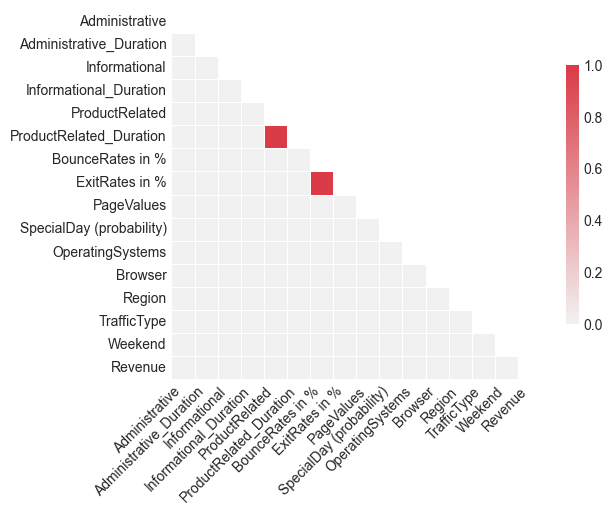

In [37]:
# plotting the corr_matrix where cell>=0.75
display('highly correlated features: ')
import seaborn as sns
ax = sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=1, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .7})
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

In [38]:
feature_customer = data.copy()

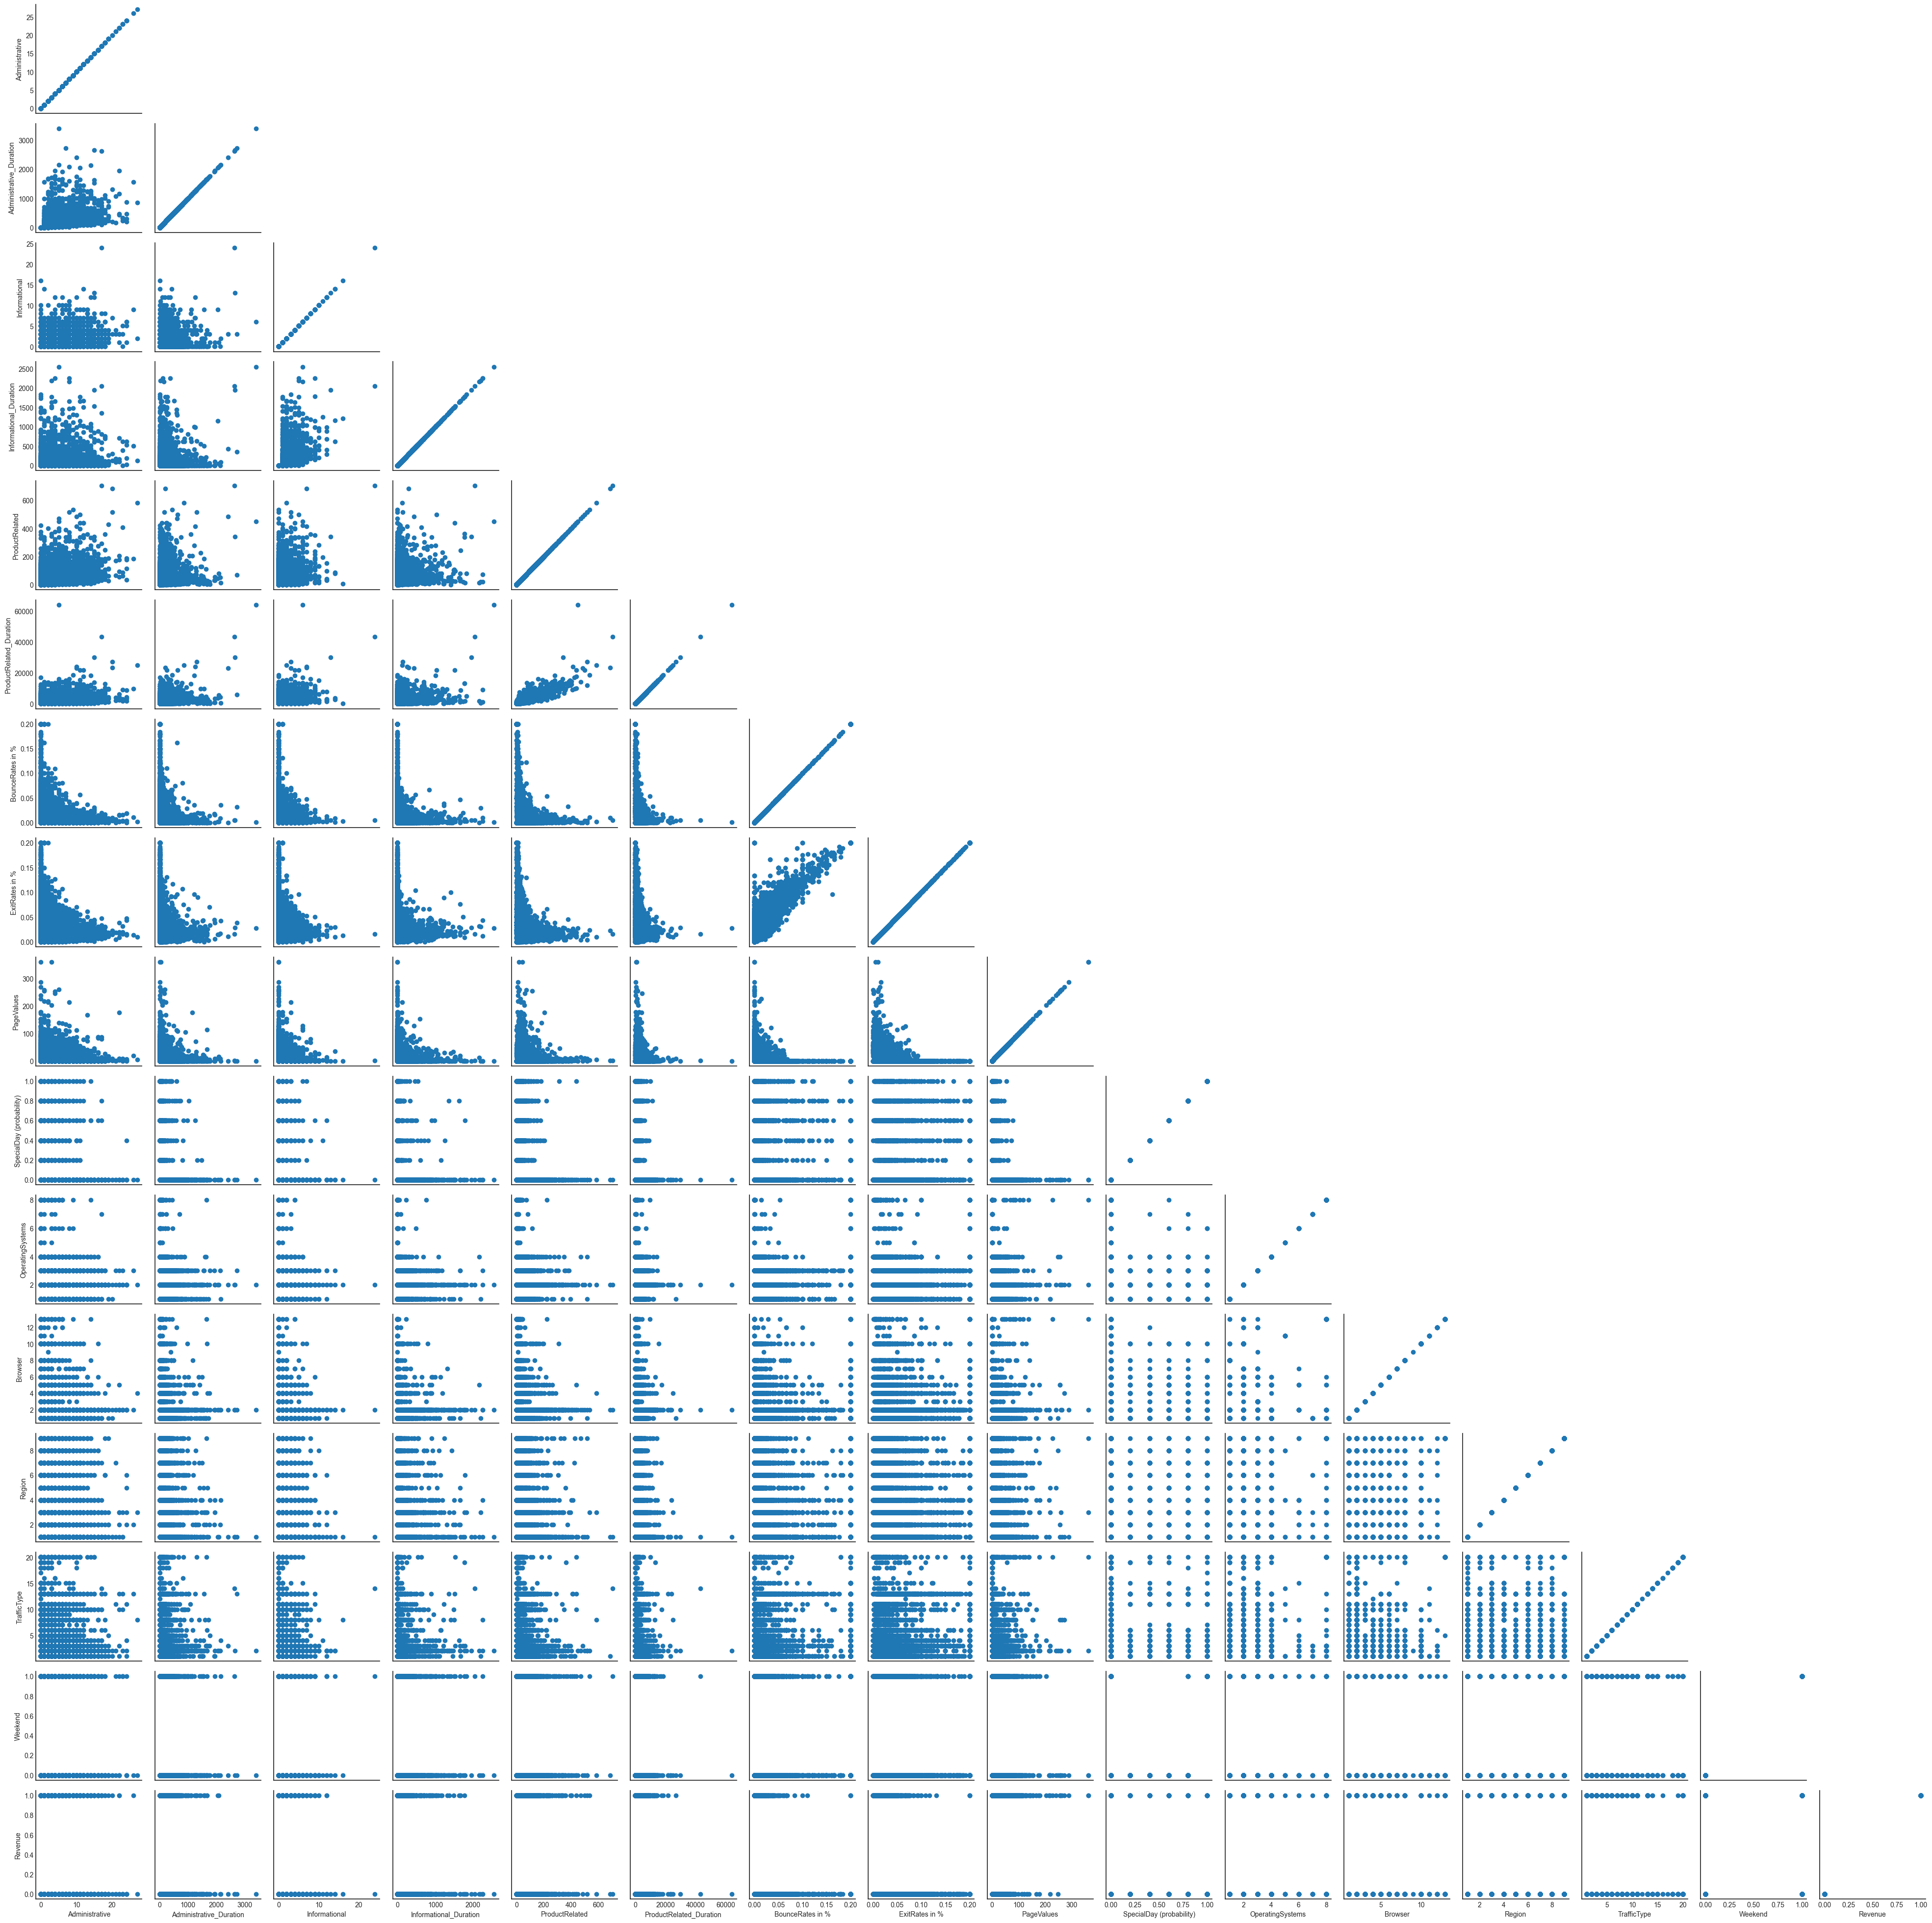

In [44]:
feature_customer.columns
import pandas as pd
data = pd.read_csv('online_shoppers_intention.csv')

# Generate a mask for the upper triangle
import numpy as np
mask = np.zeros_like(data, dtype=np.bool)
# display(data.corr())
mask[np.triu_indices_from(mask)] = True


import seaborn as sns
import matplotlib.pyplot as plt
g = sns.PairGrid(data,corner=True)
g.map(plt.scatter)

Text(0.5, 1.0, 'PageValues')

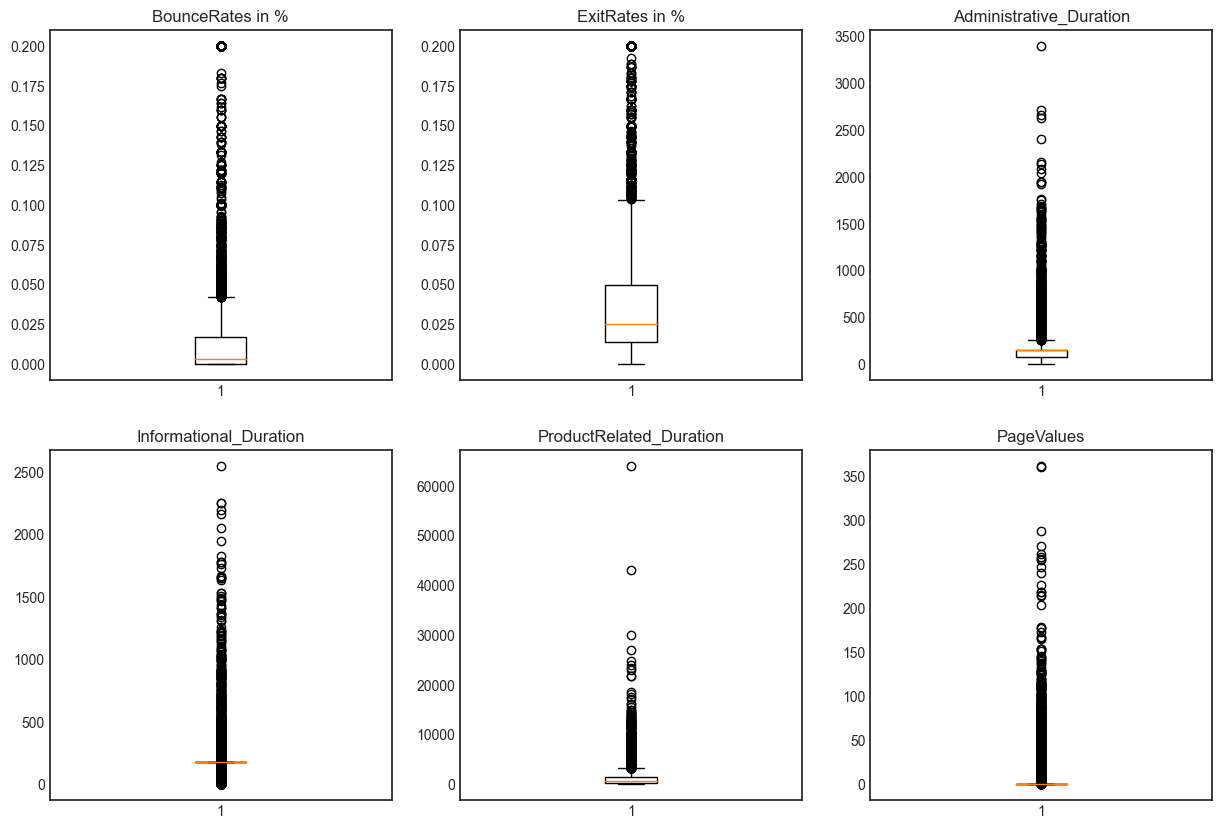

In [39]:
# display(data)
plt.figure(figsize = (15, 10))
plt.style.use('seaborn-white')

ax=plt.subplot(231)
plt.boxplot(feature_customer['BounceRates in %'])
ax.set_title('BounceRates in %')

ax=plt.subplot(232)
plt.boxplot(feature_customer['ExitRates in %'])
ax.set_title('ExitRates in %')

ax=plt.subplot(233)
plt.boxplot(feature_customer['Administrative_Duration'])
ax.set_title('Administrative_Duration')

ax=plt.subplot(234)
plt.boxplot(feature_customer['Informational_Duration'])
ax.set_title('Informational_Duration')

ax=plt.subplot(235)
plt.boxplot(feature_customer['ProductRelated_Duration'])
ax.set_title('ProductRelated_Duration')

ax=plt.subplot(236)
plt.boxplot(feature_customer['PageValues'])
ax.set_title('PageValues')

In [40]:
# removing outliers from num_cols_having_outliers
numerical_features=['BounceRates in %', 'ExitRates in %', 'Administrative_Duration', 'ProductRelated_Duration']
for cols in numerical_features:
    Q1 = feature_customer[cols].quantile(0.25)
    Q3 = feature_customer[cols].quantile(0.75)
    IQR = Q3 - Q1     
    filter = (feature_customer[cols] >= Q1 - 1.5 * IQR) & (feature_customer[cols] <= Q3 + 1.5 * IQR)
    feature_customer = feature_customer.loc[filter]

In [21]:
# manually encoding num_cols into cat_cols by replacing the values in column with either 0 or 1
feature_customer.loc[feature_customer['SpecialDay (probability)'] > 0.4, 'SpecialDay (probability)'] = 1
feature_customer.loc[feature_customer['SpecialDay (probability)'] <= 0.4, 'SpecialDay (probability)'] = 0

# as we can see now that the col contain only 0/1 values
display(feature_customer['SpecialDay (probability)'])

# count of 0s and 1s in the col
display(feature_customer['SpecialDay (probability)'].value_counts())

# converting 0/1 to bool dtype
feature_customer['SpecialDay (probability)'] = feature_customer['SpecialDay (probability)'].astype('bool')
display(feature_customer['SpecialDay (probability)'].value_counts())

4        0.0
5        0.0
9        0.0
10       0.0
11       0.0
        ... 
12324    0.0
12325    0.0
12326    0.0
12328    0.0
12329    0.0
Name: SpecialDay (probability), Length: 8766, dtype: float64

0.0    8247
1.0     519
Name: SpecialDay (probability), dtype: int64

False    8247
True      519
Name: SpecialDay (probability), dtype: int64

In [22]:
# checking remaining cat_cols
feature_customer.dtypes

Administrative              float64
Administrative_Duration     float64
Informational               float64
Informational_Duration      float64
ProductRelated              float64
ProductRelated_Duration     float64
BounceRates in %            float64
ExitRates in %              float64
PageValues                  float64
SpecialDay (probability)       bool
Month                        object
OperatingSystems              int64
Browser                       int64
Region                        int64
TrafficType                   int64
VisitorType                  object
Weekend                        bool
Revenue                        bool
dtype: object

In [23]:
# listing cat_cols
from sklearn.preprocessing import StandardScaler
Categorical_variables = ['Weekend','Revenue','Administrative','Informational','ProductRelated','SpecialDay',
                            'OperatingSystems','Browser','Region','Month','TrafficType','VisitorType']

# scaling non_cat_cols(num_cols)
feature_scale = [feature for feature in feature_customer.columns if feature not in Categorical_variables]
scaler = StandardScaler()
scaler.fit(feature_customer[feature_scale])

# combining scaled_cat_cols and num_cols together
scaled_data = pd.concat([feature_customer[['Weekend','Revenue','Administrative','Informational',
                                           'ProductRelated','SpecialDay (probability)','OperatingSystems',
                                           'Browser','Region','Month','TrafficType','VisitorType']].reset_index(drop=True),
                        pd.DataFrame(scaler.transform(feature_customer[feature_scale]), columns = feature_scale)],
                        axis=1)
scaled_data.head()

,Weekend,Revenue,Administrative,Informational,ProductRelated,SpecialDay (probability),OperatingSystems,Browser,Region,Month,TrafficType,VisitorType,Administrative_Duration,Informational_Duration,ProductRelated_Duration,BounceRates in %,ExitRates in %,PageValues,SpecialDay (probability)
0,True,False,3.0,2.0,10.0,False,3,3,1,Feb,4,Returning_Visitor,0.593221,0.049336,-0.326655,1.426010,1.421904,-0.331018,-0.250862
1,False,False,3.0,2.0,19.0,False,2,2,1,Feb,3,Returning_Visitor,0.593221,0.049336,-0.922232,0.988818,-0.079136,-0.331018,-0.250862
2,False,False,3.0,2.0,3.0,False,2,4,1,Feb,2,Returning_Visitor,0.593221,0.049336,-0.187603,-0.650652,-0.217163,-0.331018,-0.250862
3,False,False,3.0,2.0,3.0,False,1,1,3,Feb,3,Returning_Visitor,0.593221,0.049336,-0.619232,-0.650652,2.405345,-0.331018,-0.250862
4,False,False,3.0,2.0,16.0,False,1,1,4,Feb,3,Returning_Visitor,0.593221,0.049336,-0.603187,1.296219,-0.004084,-0.331018,-0.250862


In [24]:
# only 2 cat_cols are there in dataset now
from sklearn.preprocessing import LabelEncoder
encoded_features = ['Month','VisitorType']

# fitting the LabelEncoder model with all the Cat_features one by one and 
# then encoding each feature with its corrosponding trained_model
label_data = scaled_data.copy()
label_encoder = LabelEncoder()
for col in encoded_features:
    label_data[col] = label_encoder.fit_transform(scaled_data[col])

# printing encoded features
display(label_data[encoded_features])
display(label_data.head())

,Month,VisitorType
0,2,2
1,2,2
2,2,2
3,2,2
4,2,2
...,...,...
8761,7,2
8762,1,2
8763,7,2
8764,7,2


,Weekend,Revenue,Administrative,Informational,ProductRelated,SpecialDay (probability),OperatingSystems,Browser,Region,Month,TrafficType,VisitorType,Administrative_Duration,Informational_Duration,ProductRelated_Duration,BounceRates in %,ExitRates in %,PageValues,SpecialDay (probability)
0,True,False,3.0,2.0,10.0,False,3,3,1,2,4,2,0.593221,0.049336,-0.326655,1.426010,1.421904,-0.331018,-0.250862
1,False,False,3.0,2.0,19.0,False,2,2,1,2,3,2,0.593221,0.049336,-0.922232,0.988818,-0.079136,-0.331018,-0.250862
2,False,False,3.0,2.0,3.0,False,2,4,1,2,2,2,0.593221,0.049336,-0.187603,-0.650652,-0.217163,-0.331018,-0.250862
3,False,False,3.0,2.0,3.0,False,1,1,3,2,3,2,0.593221,0.049336,-0.619232,-0.650652,2.405345,-0.331018,-0.250862
4,False,False,3.0,2.0,16.0,False,1,1,4,2,3,2,0.593221,0.049336,-0.603187,1.296219,-0.004084,-0.331018,-0.250862


# Data Modeling Starts

Feature Selection

[0.01480689 0.04440307 0.02432101 0.0583988  0.00239181 0.03071797
 0.03096527 0.04218969 0.04786538 0.04311024 0.01366697 0.05037709
 0.02948458 0.06876967 0.04338829 0.06669068 0.38652502 0.00192759]


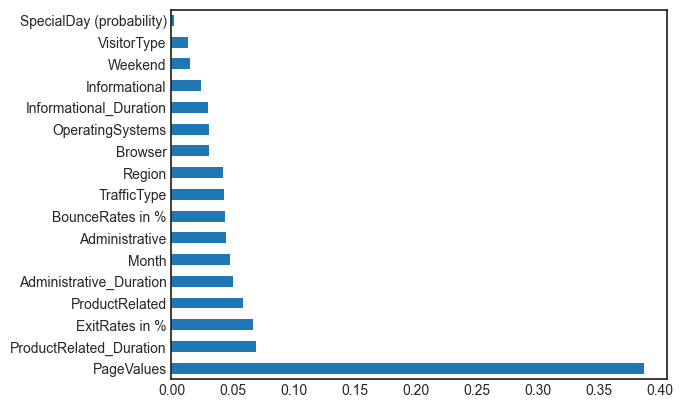

In [25]:
# x y split
from sklearn.ensemble import ExtraTreesClassifier
x = label_data.drop(['Revenue'],axis=1)
ay = label_data.Revenue

# printing importance of 17 most_important features using ExtraTreeClassifier(ETC)
model = ExtraTreesClassifier()
model.fit(x,ay)
print(model.feature_importances_)

# plotting first 17 most_important features 
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(17).plot(kind='barh')
plt.show()

In [26]:
# dropping un_important columns based on suggestion of ETC and dropping the target_col also to split data into x,y
# x y split
x = label_data.drop(['SpecialDay (probability)','VisitorType','Weekend','Revenue'],axis=1)
ay = label_data.Revenue

In [27]:
# train test split
from sklearn.model_selection import train_test_split
x_train, x_test, ay_train, ay_test = train_test_split(x, ay, train_size=0.8, random_state=1)
print("Input Training:",x_train.shape)
print("Input Test:",x_test.shape)
print("Output Training:",ay_train.shape)
print("Output Test:",ay_test.shape)

Input Training: (7012, 14)
Input Test: (1754, 14)
Output Training: (7012,)
Output Test: (1754,)


Highest Accuracy Model Selection Starts

# with cross_validation 
# w/o hyperparameter_tunning, 

In [28]:
# CrossValidation of dataset using diff classifier algos 
# and printing mean accuracy of all folds on each algo 

# LR and DT
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
logreg_cv = LogisticRegression(random_state=0)
dt_cv = DecisionTreeClassifier()

#  RF and KNN
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
rt_cv = RandomForestClassifier()
knn_cv = KNeighborsClassifier()

# SVC
from sklearn.svm import SVC
svc_cv = SVC(kernel='linear')

# Naive Bays Classifier(NBC)
from sklearn.naive_bayes import BernoulliNB
nb_cv = BernoulliNB()

# CrossValidation
cv_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'RandomForest',3:'KNN',4:'SVC',5:'Naive Bayes'}
cv_models = [logreg_cv, dt_cv, rt_cv, knn_cv, svc_cv, nb_cv]

from sklearn.model_selection import cross_val_score
for i,model in enumerate(cv_models):
    print("{} Test Accuracy: {}".format(cv_dict[i], cross_val_score(model, x, ay, cv=10, scoring ='accuracy').mean()))

Logistic Regression Test Accuracy: 0.8840916782514071
Decision Tree Test Accuracy: 0.8473421481493052
RandomForest Test Accuracy: 0.898919365000026
KNN Test Accuracy: 0.8507837272145078
SVC Test Accuracy: 0.8881963209988388
Naive Bayes Test Accuracy: 0.8863730911211425


# w/o cross_validation 
# w/o hyperparameter_tunning, 


In [29]:
# Inter Classifiying Algo's Comparison
# and printing the best classifier algo found

# Creating the pipeline
from sklearn.pipeline import Pipeline
pipeline_lr = Pipeline([('lr_classifier',LogisticRegression(random_state=0))])
pipeline_dt = Pipeline([('dt_classifier',DecisionTreeClassifier())])
pipeline_randomforest = Pipeline([('rf_classifier',RandomForestClassifier())])
pipeline_knn = Pipeline([('knn_classifier',KNeighborsClassifier())])
pipeline_svc = Pipeline([('svc_classifier',SVC(kernel='linear'))])
pipeline_nb = Pipeline([('nb_classifier',BernoulliNB())])

# Assigning the pipeline and relevant outcome variable
pipelines = [pipeline_lr, pipeline_dt, pipeline_randomforest, pipeline_knn, pipeline_svc, pipeline_nb]
best_accuracy=0.0
best_classifier=0
best_pipe=""

# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'RandomForest', 3:'KNN', 4:'SVC', 5:'Naive Bayes'}

# Fitting each (model)pipe
for pipe in pipelines:
	pipe.fit(x_train, ay_train)

# Evaluating each model
for i,model in enumerate(pipelines):
    print("{} Test Accuracy: {}".format(pipe_dict[i], model.score(x_test, ay_test))) # w/o cross_val
    # model.score() basically predicts and evaluates the score as well. 

Logistic Regression Test Accuracy: 0.8779931584948689
Decision Tree Test Accuracy: 0.8517673888255416
RandomForest Test Accuracy: 0.9002280501710376
KNN Test Accuracy: 0.8506271379703535
SVC Test Accuracy: 0.8825541619156214
Naive Bayes Test Accuracy: 0.8836944127708096


In [30]:
# Choosing the best accuracy model by inter_comparing their accuracies
for i,model in enumerate(pipelines):
    if model.score(x_test, ay_test) > best_accuracy:
        best_accuracy = model.score(x_test, ay_test)
        best_pipe = model
        best_classifier = i
print('Classifier with best accuracy: {}'.format(pipe_dict[best_classifier]))

Classifier with best accuracy:RandomForest


# the best accuracy which we get among ((6 diff algo models) * (with and w/o cross_val) ie,==> among 12 models) 
# we get best accuracy from random_forest of w/o cross_validation model set
# so going with this combination, next we will try hyperparameter tunning with RF_w/o_crossVal_model 

trying hyperparameter tunning with RF_w/o_crossVal_model 

In [31]:
# Create a pipeline
from sklearn.pipeline import make_pipeline
pipe = make_pipeline((RandomForestClassifier()))

# Create dictionary with candidate_learning_algorithms and their hyperparameters
grid_param = [{"randomforestclassifier": [RandomForestClassifier()],
                 "randomforestclassifier__n_estimators": [10, 100, 1000],
                 "randomforestclassifier__max_depth":[5,8,15,25,30,None],
                 "randomforestclassifier__min_samples_leaf":[1,2,5,10,15,100],
                 "randomforestclassifier__max_leaf_nodes": [2, 5,10]}]

# Gridsearch of the pipeline, the fit the best model
from sklearn.model_selection import GridSearchCV
# tring GScv with (RF_model & aboveDefined_hyper_params & 5Fold_CV)  
gridsearch = GridSearchCV(pipe, grid_param, verbose=0,n_jobs=-1) # cv==5 => no of folds in cross_val, which is not set here
# Fit grid search
best_model = gridsearch.fit(x_train, ay_train)

# prediction using RFC pipeline
print(best_model.best_estimator_)
print("The mean accuracy of the model is:", best_model.score(x_test, ay_test))

Pipeline(steps=[('randomforestclassifier',
                 RandomForestClassifier(max_depth=8, max_leaf_nodes=10,
                                        min_samples_leaf=2))])
The mean accuracy of the model is: 0.8876852907639681


trying hyperparameter tunning with RF_with_crossVal_model 

In [32]:
# Create a pipeline
from sklearn.pipeline import make_pipeline
pipe = make_pipeline((RandomForestClassifier()))

# Create dictionary with candidate_learning_algorithms and their hyperparameters
grid_param = [{"randomforestclassifier": [RandomForestClassifier()],
                 "randomforestclassifier__n_estimators": [10, 100, 1000],
                 "randomforestclassifier__max_depth":[5,8,15,25,30,None],
                 "randomforestclassifier__min_samples_leaf":[1,2,5,10,15,100],
                 "randomforestclassifier__max_leaf_nodes": [2, 5,10]}]

# Gridsearch of the pipeline, the fit the best model
from sklearn.model_selection import GridSearchCV
# tring GScv with (RF_model & aboveDefined_hyper_params & 5Fold_CV)  
gridsearch = GridSearchCV(pipe, grid_param, cv=5, verbose=0,n_jobs=-1) # cv==5 => no of folds in cross_val
# Fit grid search
best_model = gridsearch.fit(x_train, ay_train)

# prediction using RFC pipeline
print(best_model.best_estimator_)
print("The mean accuracy of the model is:", best_model.score(x_test, ay_test))

Pipeline(steps=[('randomforestclassifier',
                 RandomForestClassifier(max_depth=25, max_leaf_nodes=10,
                                        min_samples_leaf=15))])
The mean accuracy of the model is: 0.8814139110604333


In [36]:
# RFC (train, predict, accuracy_check) using 1 matrices
from sklearn import metrics
rt = RandomForestClassifier(max_depth=30, max_leaf_nodes=10,min_samples_leaf=15)
rt.fit(x_train, ay_train)
py_test=rt.predict(x_test)

from sklearn.metrics import classification_report
print("Accuracy:", metrics.accuracy_score(ay_test, py_test))
print("Classification Report:\n", classification_report(ay_test, py_test))

Accuracy: 0.8882554161915621
Classification Report:
               precision    recall  f1-score   support

       False       0.89      0.98      0.94      1455
        True       0.83      0.43      0.57       299

    accuracy                           0.89      1754
   macro avg       0.86      0.71      0.75      1754
weighted avg       0.88      0.89      0.87      1754



In [46]:
#set up plotting area
plt.figure(0).clf()

# #fit logistic regression model and plot ROC curve
# from
# model = LogisticRegression()
# model.fit(x_train, ay_train)
# y_pred = model.predict_proba(x_test)[:, 1]
# fpr, tpr, _ = metrics.roc_curve(ay_test, py_test)
# auc = round(metrics.roc_auc_score(ay_test, py_test), 4)
# plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))

#fit gradient boosted model and plot ROC curve
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
model.fit(x_train, ay_train)
y_pred = model.predict_proba(x_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(ay_test, py_test)
auc = round(metrics.roc_auc_score(ay_test, py_test), 4)
plt.plot(fpr,tpr,label="Gradient Boosting, AUC="+str(auc))

#add legend
plt.legend()

NameError: name 'x_train' is not defined

<Figure size 640x480 with 0 Axes>